# T3.3: Analiza e visualiza os datos de COVID de Italia (PANDAS+MongoDB+SeaBorn)
## Ralphy Núñez Mercado
Gráficos con SeaBorn
- Dende Python, conecta coa máquina que ten o dataset de COVID de Italia.
- Carga o dataset nun DataFrame de PANDAS (podes empregar o código da práctica anterior).
- Pon unha variable en función da cal se lea de mongo ou se empregue o read_json() para ler o dataset dun arquivo no seu lugar.
- Debuxa 4 gráficos DIFERENTES (de diferente tipo) con SeaBorn relacionando variables entre eles que queden vistosos e xeitosos. Lembra:
    1. Alomenos un deles ten que ser de dispersión entre dúas variables.
    2. Pon un theme e un palette distinto en cada gráfico.
Máis información:

- https://seaborn.pydata.org/examples/index.html
- https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://seaborn.pydata.org/examples/different_scatter_variables.html

### ⬇️ Imports Necesarios 

In [2]:
from pymongo import MongoClient
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ⛓️‍💥 Conectar con MongoDB a el dataset de Covid Italia

In [3]:
# %conda install -y pymongo dnspython

#HOST="(...).mongodb.net"
HOST="cluster0.6ej71.mongodb.net"
PORT=27017
USERNAME="ralphynm1000"
PASSWORD="hola1234"

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/")



### Obtener dataframe

In [4]:
db_Ejercicios = cli_mongo['Ejercicios']
covid_italia = db_Ejercicios['covid_italia']

documentos = list(covid_italia.find())

df = pd.DataFrame(documentos)

### Visualizar el dataframe

In [5]:
df

,_id,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,67dc6b47e0cb76df9c5092f8,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,1,None,None,None,None
1,67dc6b47e0cb76df9c5092f9,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None,None,None,None
2,67dc6b47e0cb76df9c5092fa,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None,None,None,None
3,67dc6b47e0cb76df9c5092fb,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None,None,None,None
4,67dc6b47e0cb76df9c5092fc,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140175,67dc6b5ce0cb76df9c52b687,2022-10-08T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,388769,None,ITH,ITH3,ITH35
140176,67dc6b5ce0cb76df9c52b688,2022-10-08T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,450916,None,ITH,ITH3,ITH36
140177,67dc6b5ce0cb76df9c52b689,2022-10-08T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,99048,None,ITH,ITH3,ITH37
140178,67dc6b5ce0cb76df9c52b68a,2022-10-08T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,None,NaN,NaN,35707,None,ITH,ITH3,None


### 

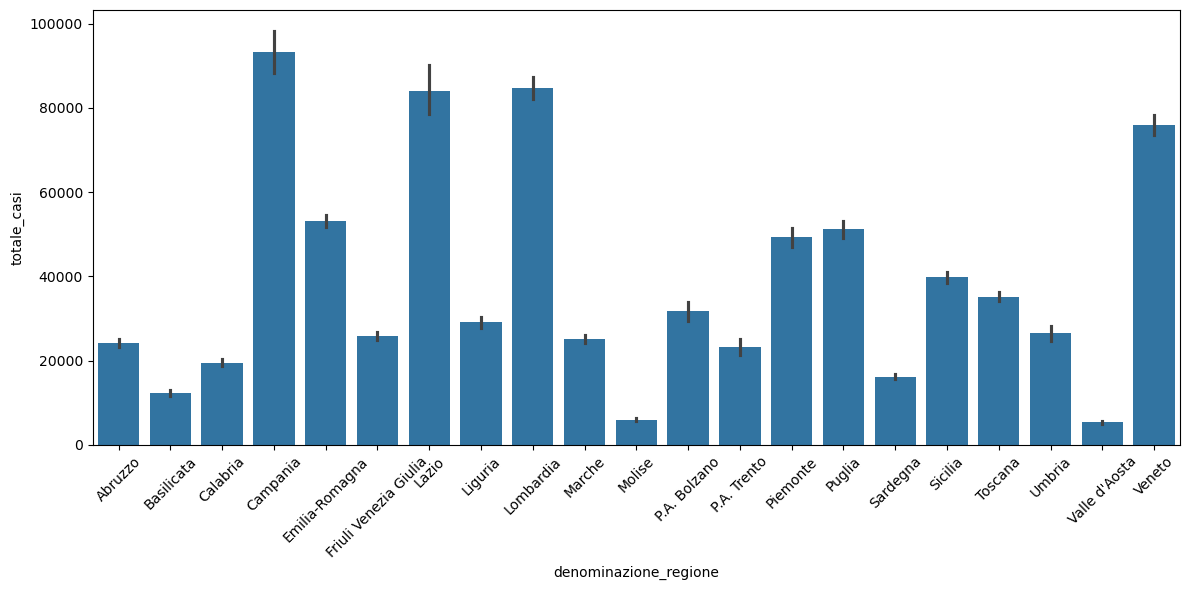

In [6]:
plt.figure(figsize=(12, 6)) 
plt.xticks(rotation=45)
sns.barplot(x=df['denominazione_regione'], y=df['totale_casi'])
plt.tight_layout()
plt.show()